# Covid Tracker 

GOAL: analyze covid data from [Kaggle](https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases). 

The data contains:

* location- country
* date 
* variant 
* num_sequences - the number of sequences processed (for the country, variant and date)
* perc_sequences - percentage of sequences from the total number of sequences (for the country, variant and date)
* numsequencestotal - total number of sequences (for the country, variant and date)

Date: 22/12/2021


## Data and Setup

____
**Imports**

In [90]:
import numpy as np
import pandas as pd

import math

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime as datetime
from datetime import timedelta

**Style**

In [2]:
sns.set()
sns.set_style("whitegrid")

%matplotlib inline

**Read in the csv file as a dataframe**

In [3]:
df = pd.read_csv("covid-variants.csv")

**Check the info() and the head() of the df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96048 entries, 0 to 96047
Data columns (total 6 columns):
location               96048 non-null object
date                   96048 non-null object
variant                96048 non-null object
num_sequences          96048 non-null int64
perc_sequences         96048 non-null float64
num_sequences_total    96048 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ MB


In [5]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


**Convert date str to DateTime objects**

In [9]:
df["datetime"] = pd.to_datetime(df["date"])

## Covid Data

**All variants**

In [10]:
variants = list(df["variant"].unique())
variants

['Alpha',
 'B.1.1.277',
 'B.1.1.302',
 'B.1.1.519',
 'B.1.160',
 'B.1.177',
 'B.1.221',
 'B.1.258',
 'B.1.367',
 'B.1.620',
 'Beta',
 'Delta',
 'Epsilon',
 'Eta',
 'Gamma',
 'Iota',
 'Kappa',
 'Lambda',
 'Mu',
 'Omicron',
 'S:677H.Robin1',
 'S:677P.Pelican',
 'others',
 'non_who']

**All variants visualized**

Text(0.5, 0, 'Date')

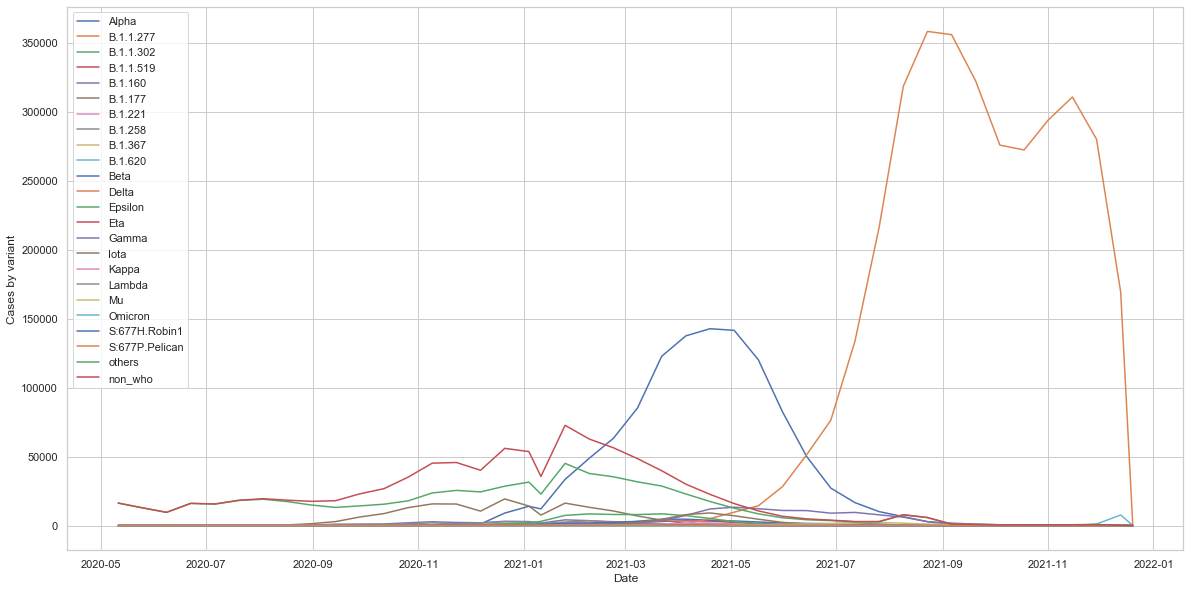

In [11]:
fig, ax = plt.subplots(figsize = (20, 10))

for variant in df["variant"].unique():
    cases =  df[df["variant"] == variant].groupby("datetime")["num_sequences"].agg("sum")
    ax.plot(cases, label=variant)
    
ax.legend()
plt.ylabel("Cases by variant")
plt.xlabel("Date")

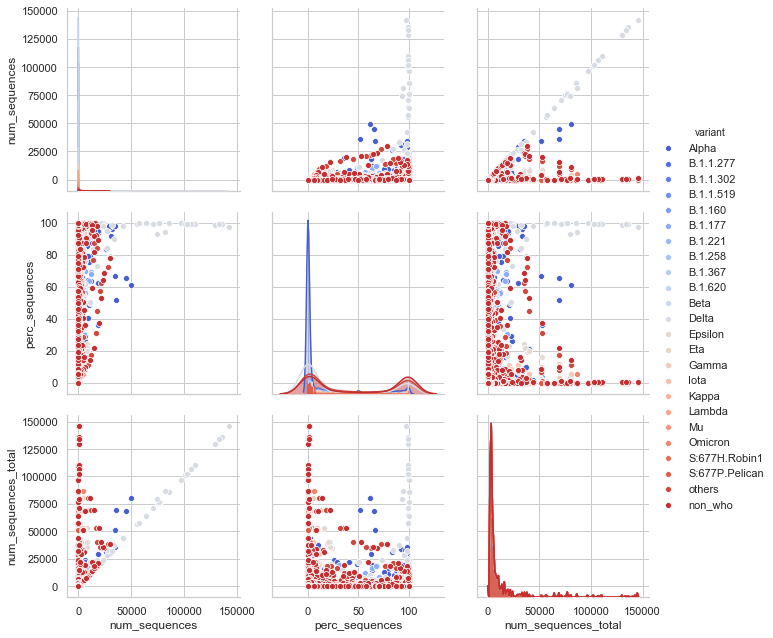

In [182]:
sns.pairplot(df, hue="variant", height=3, palette="coolwarm")

In [ ]:
sns.pairplot(df, hue="variant"=="Omicron", height=3, palette="coolwarm")

**Select location and variants**

In [12]:
turkey = df[df["location"] == "Turkey"]

usa = df[df["location"] == "United States"]

france = df[df["location"] == "France"]

omicron = df[df["variant"] == "Omicron"]

**Plots**

Text(0.5, 0, 'Date')

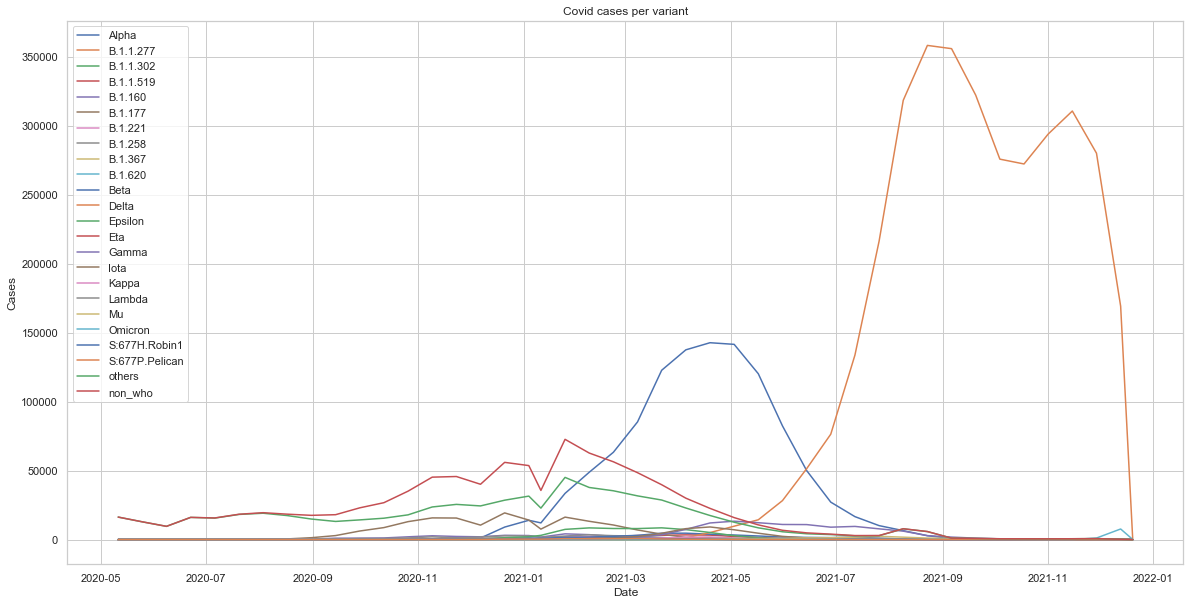

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))

for variant in df["variant"].unique():
            cases =  df[df["variant"] == variant].groupby("datetime")["num_sequences"].agg("sum")
            ax.plot(cases, label=variant)

ax.legend()
plt.title("Covid cases per variant")
plt.ylabel("Cases")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

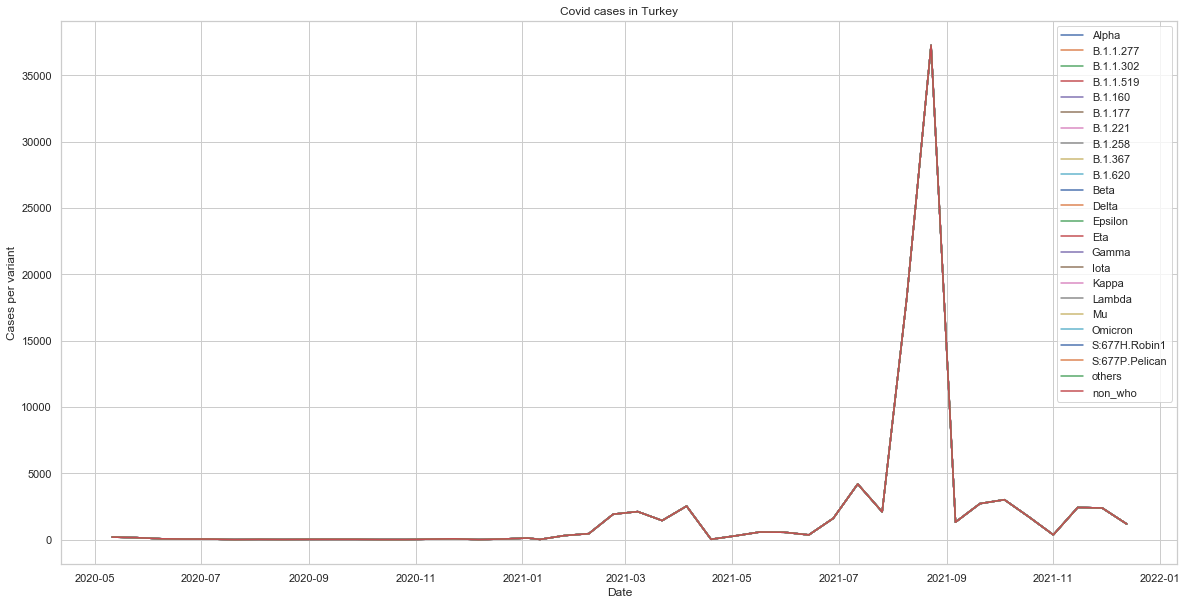

In [180]:
fig, ax = plt.subplots(figsize = (20, 10))

for variant in df["variant"].unique():
            cases_tr =  turkey.groupby("datetime")["num_sequences"].agg("sum")
            ax.plot(cases_tr, label=variant)

ax.legend()
plt.title("Covid cases in Turkey")
plt.ylabel("Cases per variant")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

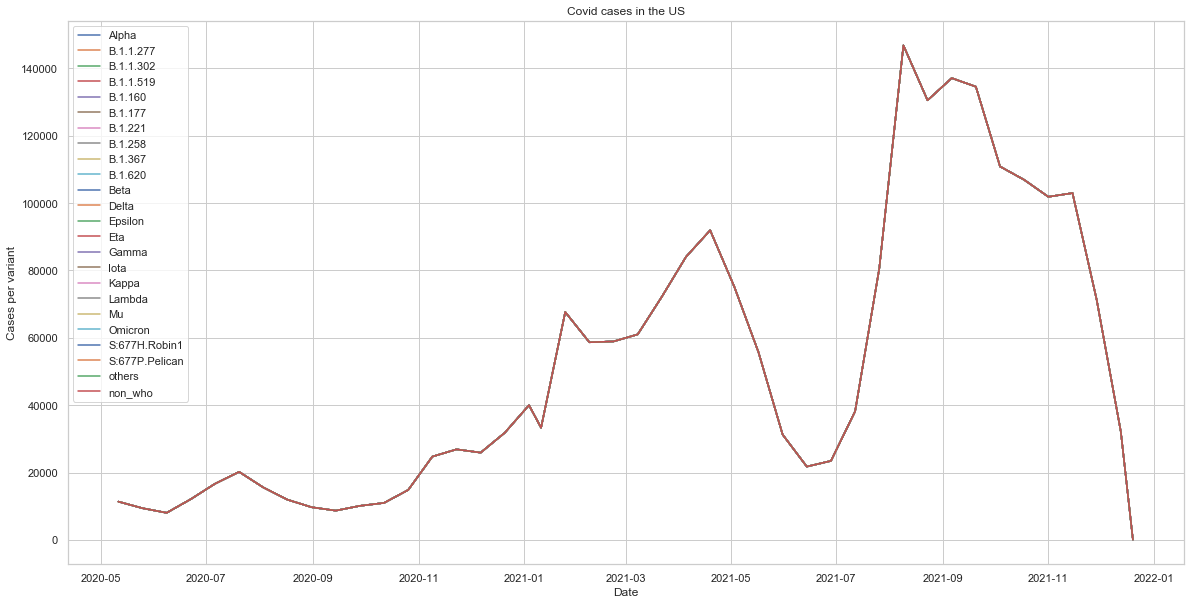

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))

for variant in df["variant"].unique():
            cases_usa =  usa.groupby("datetime")["num_sequences"].agg("sum")
            ax.plot(cases_usa, label=variant)

ax.legend()
plt.title("Covid cases in the US")
plt.ylabel("Cases per variant")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

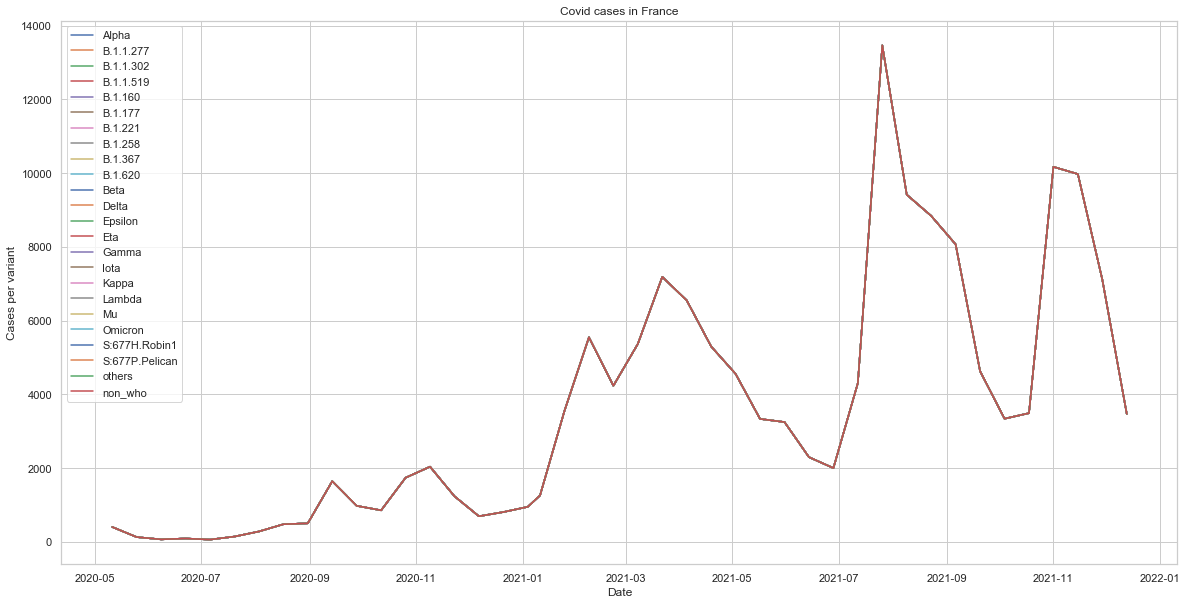

In [15]:
fig, ax = plt.subplots(figsize = (20, 10))

for variant in df["variant"].unique():
            cases_fr =  france.groupby("datetime")["num_sequences"].agg("sum")
            ax.plot(cases_fr, label=variant)

ax.legend()
plt.title("Covid cases in France")
plt.ylabel("Cases per variant")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

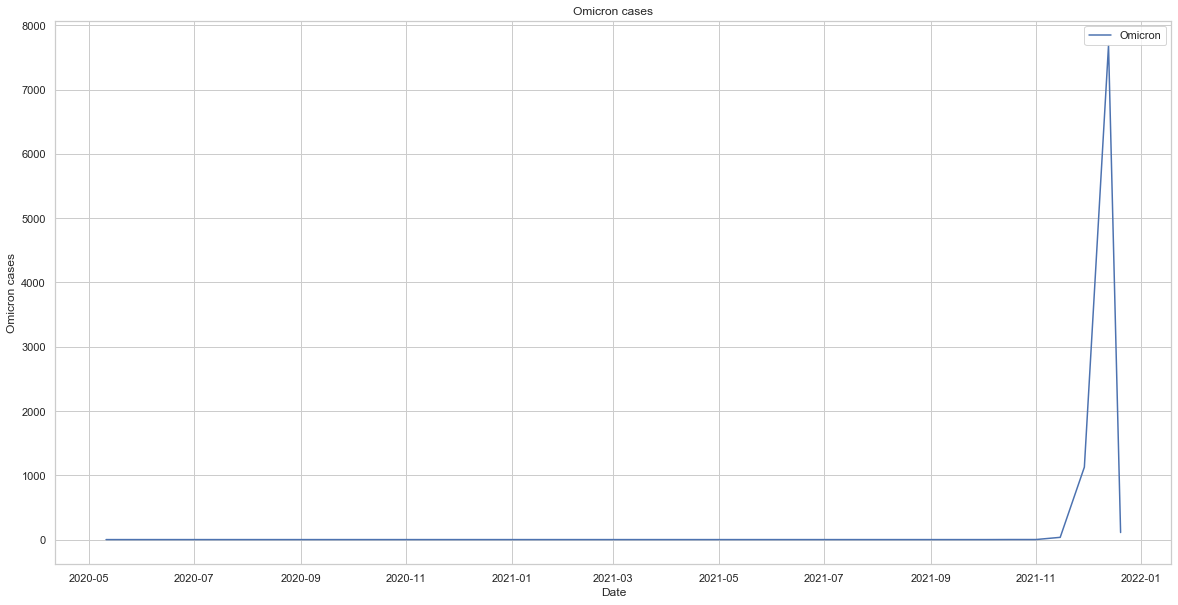

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))


cases_o =  omicron.groupby("datetime")["num_sequences"].agg("sum")
ax.plot(cases_o, label="Omicron")

ax.legend()
plt.title("Omicron cases")
plt.ylabel("Omicron cases")
plt.xlabel("Date")

## Variant percentages (10 days)

In [59]:
perc = df[['date','variant','location','perc_sequences']].copy()
perc

,date,variant,location,perc_sequences
0,2020-07-06,Alpha,Angola,0.0
1,2020-07-06,B.1.1.277,Angola,0.0
2,2020-07-06,B.1.1.302,Angola,0.0
3,2020-07-06,B.1.1.519,Angola,0.0
4,2020-07-06,B.1.160,Angola,0.0
5,2020-07-06,B.1.177,Angola,0.0
6,2020-07-06,B.1.221,Angola,0.0
7,2020-07-06,B.1.258,Angola,0.0
8,2020-07-06,B.1.367,Angola,0.0
9,2020-07-06,B.1.620,Angola,0.0


In [147]:
perc["date"] = perc["date"].apply(pd.to_datetime, dayfirst = True)

**Select variants**

In [148]:
perc_om_max = perc[perc["date"]>perc["date"].max()-datetime.timedelta(days = 10)][perc["variant"] == "Omicron"].sort_values("perc_sequences",ascending = False)

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [149]:
perc_om_min = perc[perc["date"] > perc["date"].max()-datetime.timedelta(days = 10)][perc["variant"] == "Omicron"].sort_values("perc_sequences",ascending = True)

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [150]:
perc_del_max = perc[perc["date"] > perc["date"].max()-datetime.timedelta(days = 10)][perc["variant"] == "Delta"].sort_values("perc_sequences",ascending = False)

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [151]:
perc_del_min = perc[perc["date"] > perc["date"].max()-datetime.timedelta(days = 10)][perc["variant"] == "Delta"].sort_values("perc_sequences",ascending = True)

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [152]:
fig = px.bar(perc_om_max, x="location", y="perc_sequences",title="Omicron percentage (10 days)")
fig.update_layout(yaxis_range=[0,100])
fig.show()

In [153]:
fig = px.bar(perc_del_max, x="location", y="perc_sequences",title="Delta percentage (10 days)")
fig.update_layout(yaxis_range=[0,100])
fig.show()